## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats

In [3]:
# # reading csv
# def read(file):
#     df_name = pd.read_csv(f'{file}.csv')
#     print(df_name.head())
#     return df_name

In [4]:
# df_flight_test=pd.read_csv('Flight_test.csv')
# df_flight_test.head()
# df_fuel_comsumption= pd.read_csv('fuel_comsumption.csv')
# df_fuel_comsumption.head()
df_flights_sample=pd.read_csv('Flights_sample.csv')
df_flights_sample.head()
df_flights_sample= df_flights_sample.drop('Unnamed: 0', axis=1)

In [5]:
print(df_flights_sample.columns)

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [6]:
df= pd.read_csv('data.csv')

In [ ]:
df.head()

,fl_date,mkt_unique_carrier,tail_num,origin,dest,arr_delay,distance,month,month_day,week_day,dep_hour,arr_hour
0,2019-08-30,AS,N644QX,PAE,LAX,-19.0,984,8,30,4,16.0,18.0
1,2019-08-30,AS,N644QX,LAX,PAE,-24.0,984,8,30,4,19.0,22.0
2,2019-08-30,AS,N630QX,PAE,PDX,-18.0,161,8,30,4,6.0,7.0
3,2019-08-30,AS,N644QX,PDX,PAE,-8.0,161,8,30,4,7.0,8.0
4,2019-08-30,AS,N648QX,PAE,PDX,15.0,161,8,30,4,13.0,14.0


In [ ]:
# df['arr_delay'].mean()
df['arr_delay'].median()


-6.0

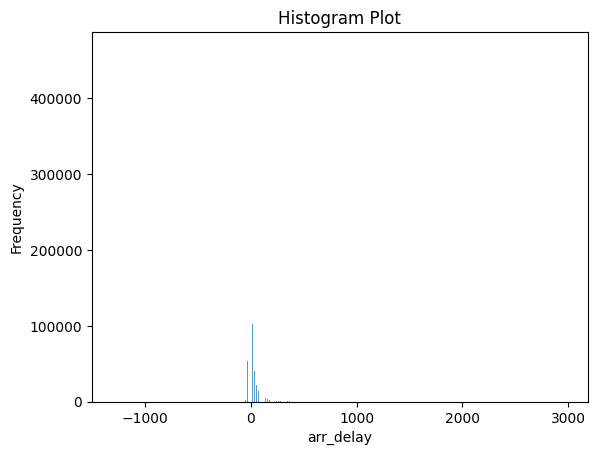

In [ ]:
# Create a histogram plot using seaborn
sns.histplot(df['arr_delay'])

# Set the x-axis label
plt.xlabel('arr_delay')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title
plt.title('Histogram Plot')

# Display the plot
plt.show()

In [ ]:
from scipy import stats
stat, p = stats.shapiro(df['arr_delay'])
print('%0.15f' % p)

1.000000000000000


c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### **Task 6**: How many states cover 50% of US air traffic? 

In [ ]:
# column_numbers = [0, 10, 13] 
# df_flights_o_d=df_flights_sample.iloc[:, column_numbers].copy()
# df_flights_o_d.head()

,fl_date,origin_city_name,dest_city_name
0,2018-07-19,"Charlotte, NC","Daytona Beach, FL"
1,2018-01-15,"Newark, NJ","Burlington, VT"
2,2018-07-29,"Indianapolis, IN","Denver, CO"
3,2019-03-04,"Salt Lake City, UT","Las Vegas, NV"
4,2019-07-08,"Greensboro/High Point, NC","Charlotte, NC"


In [ ]:
df_flights_o_d['origin_state'] = df_flights_o_d['origin_city_name'].str.split(', ').str[1]
df_flights_o_d['destination_state'] = df_flights_o_d['dest_city_name'].str.split(', ').str[1]
df_flights_o_d.head()

,fl_date,origin_city_name,dest_city_name,origin_state,destination_state
0,2018-07-19,"Charlotte, NC","Daytona Beach, FL",NC,FL
1,2018-01-15,"Newark, NJ","Burlington, VT",NJ,VT
2,2018-07-29,"Indianapolis, IN","Denver, CO",IN,CO
3,2019-03-04,"Salt Lake City, UT","Las Vegas, NV",UT,NV
4,2019-07-08,"Greensboro/High Point, NC","Charlotte, NC",NC,NC


In [ ]:
df_flights_o_d['origin_state'].nunique()

53

In [ ]:
df_flights_o_d['destination_state'].nunique()

53

In [ ]:
df_flights_o_d.shape

(500000, 5)

In [ ]:
d=df_flights_o_d['origin_state'].value_counts()
total= d.sum()
cumulative_percentage= (d/total).cumsum() * 100
cumulative_percentage.head(10)

origin_state
CA    10.8440
TX    20.7198
FL    27.9676
IL    34.3042
GA    39.5752
NY    44.8218
NC    49.4206
CO    53.3148
PA    56.3188
DC    59.3036
Name: count, dtype: float64

In [ ]:
d=df_flights_o_d['destination_state'].value_counts()
total= d.sum()
cumulative_percentage= (d/total).cumsum() * 100
cumulative_percentage.head(10)

destination_state
CA    10.9132
TX    20.8444
FL    28.0440
IL    34.3884
GA    39.7158
NY    44.8804
NC    49.5206
CO    53.4440
PA    56.4374
DC    59.4064
Name: count, dtype: float64

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [ ]:
column_numbers = [0, 16,23,29,30,32] 
df_speed=df_flights_sample.iloc[:, column_numbers].copy()
df_speed.head()

,fl_date,dep_delay,arr_delay,actual_elapsed_time,air_time,distance
0,2018-07-19,25.0,114.0,177.0,66.0,416
1,2018-01-15,-5.0,-11.0,74.0,42.0,266
2,2018-07-29,-3.0,1.0,164.0,148.0,977
3,2019-03-04,77.0,80.0,90.0,58.0,368
4,2019-07-08,11.0,12.0,71.0,31.0,83


In [ ]:
df_speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              500000 non-null  object 
 1   dep_delay            491667 non-null  float64
 2   arr_delay            490206 non-null  float64
 3   actual_elapsed_time  490270 non-null  float64
 4   air_time             490095 non-null  float64
 5   distance             500000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 22.9+ MB


In [ ]:
df_speed.isnull().sum()

fl_date                   0
dep_delay              8333
arr_delay              9794
actual_elapsed_time    9730
air_time               9905
distance                  0
dtype: int64

In [ ]:
df_speed=df_speed.dropna()

In [ ]:
df_speed['speed-airtime']=(df_speed['distance']/df_speed['air_time']).round(2)
df_speed['speed-actual_elapsed_time']= (df_speed['distance']/df_speed['actual_elapsed_time']).round(2)

df_speed['dep_delayedflight'] = np.where(df_speed['dep_delay'] > 0, 1, 0)
df_speed['arr_delayedflight'] = np.where(df_speed['arr_delay'] > 0, 1, 0)
df_speed.head()

,fl_date,dep_delay,arr_delay,actual_elapsed_time,air_time,distance,speed-airtime,speed-actual_elapsed_time,dep_delayedflight,arr_delayedflight
0,2018-07-19,25.0,114.0,177.0,66.0,416,6.30,2.35,1,1
1,2018-01-15,-5.0,-11.0,74.0,42.0,266,6.33,3.59,0,0
2,2018-07-29,-3.0,1.0,164.0,148.0,977,6.60,5.96,0,1
3,2019-03-04,77.0,80.0,90.0,58.0,368,6.34,4.09,1,1
4,2019-07-08,11.0,12.0,71.0,31.0,83,2.68,1.17,1,1


In [ ]:
total_delayed_at_departure=df_speed[df_speed['dep_delayedflight']==1].count()[0]
total_delayed_at_departure_arrived_on_time= df_speed[(df_speed['dep_delayedflight']==1)&(df_speed['arr_delayedflight']==1)].count()[0]
perc_total_delayed_at_departure_arrived_late=round((total_delayed_at_departure_arrived_on_time/total_delayed_at_departure)*100,2)
print(perc_total_delayed_at_departure_arrived_late)

73.5


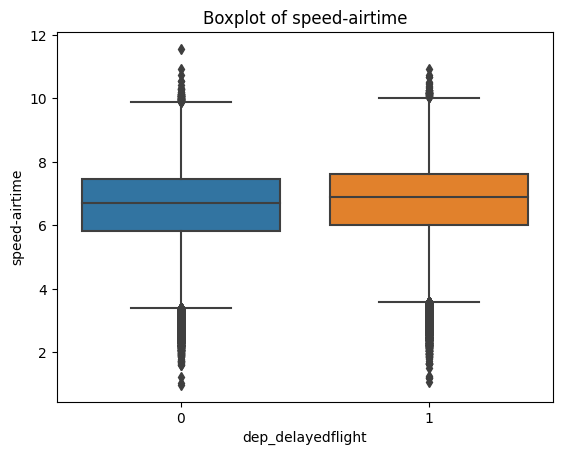

In [ ]:
# comparaison speed between delayed flight and non delayed 
#speed air_time

# Plot a boxplot
# Make a boxplot using seaborn
sns.boxplot(x='dep_delayedflight', y='speed-airtime', data=df_speed)

# Set the x-axis label
plt.xlabel('dep_delayedflight')

# Set the y-axis label
plt.ylabel('speed-airtime')

# Set the title
plt.title('Boxplot of speed-airtime')

# Display the plot
plt.show()

In [ ]:
# statistic values speed_airtime
speed_dep_delayedflight_airtime = df_speed[df_speed['dep_delayedflight']==1]['speed-airtime']
speed_dep_notdelayedflight_airtime= df_speed[df_speed['dep_delayedflight']==0]['speed-airtime']
print(speed_dep_delayedflight_airtime.mean(), speed_dep_notdelayedflight_airtime.mean())
print((speed_dep_delayedflight_airtime.std())**2, (speed_dep_notdelayedflight_airtime.std())**2)

6.751008897810001 6.595109106220665
1.5530928956210934 1.5230140100223757


In [ ]:
# statistic values speed_airtime
# Variance test
# H0 : same variance
# H1: different variance
# Equal variance test
stat, p = stats.levene(speed_dep_notdelayedflight_airtime , speed_dep_delayedflight_airtime)
p

0.5220436737541023

In [ ]:
#since p_value>0.05 we can't reject H0

In [ ]:
# test for mean
# H0: mean equal
# H1: mean speed_dep_notdelayedflight_airtime< mean speed_dep_delayedflight_airtime2
stat, p = stats.ttest_ind(speed_dep_notdelayedflight_airtime, speed_dep_delayedflight_airtime, alternative='less')
p

0.0

In [ ]:
#since P_value<0.05 we can reject H0 therefore flight speed of not delayed flight at departure is less than delayed ones

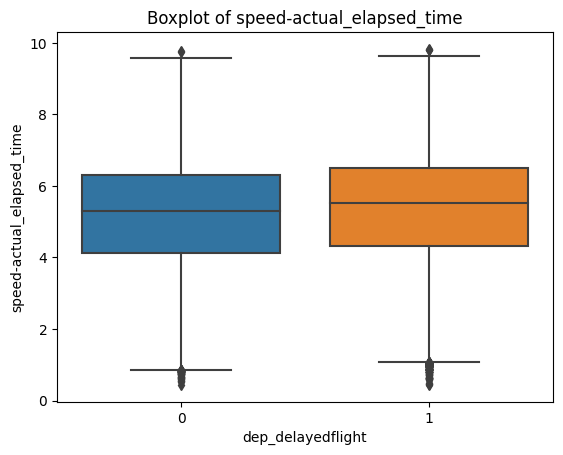

In [ ]:
# comparaison speed between delayed flight and non delayed 
#speed-actual_elapsed_time

# Plot a boxplot
# Make a boxplot using seaborn
sns.boxplot(x='dep_delayedflight', y='speed-actual_elapsed_time', data=df_speed)

# Set the x-axis label
plt.xlabel('dep_delayedflight')

# Set the y-axis label
plt.ylabel('speed-actual_elapsed_time')

# Set the title
plt.title('Boxplot of speed-actual_elapsed_time')

# Display the plot
plt.show()

In [ ]:
# statistic values speed-actual_elapsed_time
speed_dep_delayedflight_actual_elapsed_time = df_speed[df_speed['dep_delayedflight']==1]['speed-actual_elapsed_time']
speed_dep_notdelayedflight_actual_elapsed_time = df_speed[df_speed['dep_delayedflight']==0]['speed-actual_elapsed_time']
print(speed_dep_delayedflight_actual_elapsed_time.mean(), speed_dep_notdelayedflight_actual_elapsed_time.mean())
print((speed_dep_delayedflight_actual_elapsed_time.std())**2, (speed_dep_notdelayedflight_actual_elapsed_time.std())**2)

5.362746097845951 5.1736665448871175
2.3736193112747985 2.3130637660160227


In [ ]:
# statistic values speed_airtime
# Variance test
# H0 : same variance
# H1: different variance
# Equal variance test
stat, p = stats.levene(speed_dep_delayedflight_actual_elapsed_time, speed_dep_notdelayedflight_actual_elapsed_time)
p

0.0013585851777815974

In [ ]:
# same variance

In [ ]:
# test for mean
# H0: mean equal
# H1: mean speed_dep_notdelayedflight_actual_elapsed_time < speed_dep_delayedflight_actual_elapsed_time
stat, p = stats.ttest_ind(speed_dep_notdelayedflight_actual_elapsed_time, speed_dep_delayedflight_actual_elapsed_time, alternative='less')
p

0.0

In [ ]:
# same mean

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [ ]:
column_numbers = [0, 14,18,30,32] 
df_takeoff=df_flights_sample.iloc[:, column_numbers].copy()
df_takeoff.head()

,fl_date,crs_dep_time,wheels_off,air_time,distance
0,2018-07-19,1140,1349.0,66.0,416
1,2018-01-15,1600,1618.0,42.0,266
2,2018-07-29,1055,1100.0,148.0,977
3,2019-03-04,2045,2216.0,58.0,368
4,2019-07-08,1120,1157.0,31.0,83


In [ ]:
df_takeoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   fl_date       500000 non-null  object 
 1   crs_dep_time  500000 non-null  int64  
 2   wheels_off    491380 non-null  float64
 3   air_time      490095 non-null  float64
 4   distance      500000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 19.1+ MB


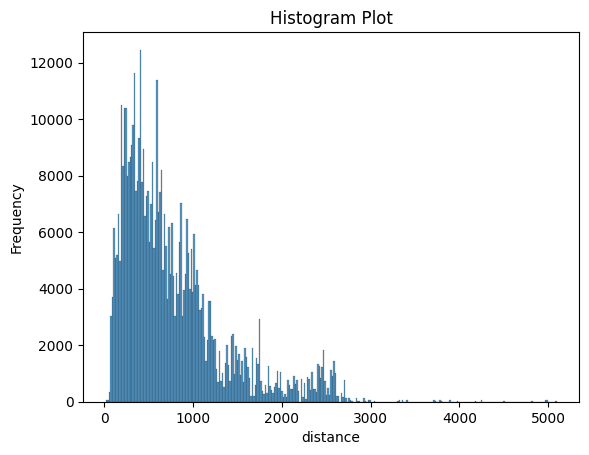

In [ ]:
# Create a histogram plot using seaborn
sns.histplot(df_takeoff['distance'])

# Set the x-axis label
plt.xlabel('distance')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title
plt.title('Histogram Plot')

# Display the plot
plt.show()

In [ ]:
mean_distance=round(df_takeoff['distance'].mean(),2)
std_distance= round(df_takeoff['distance'].std(),2)
print(mean_distance)
print(std_distance)

767.42
584.92


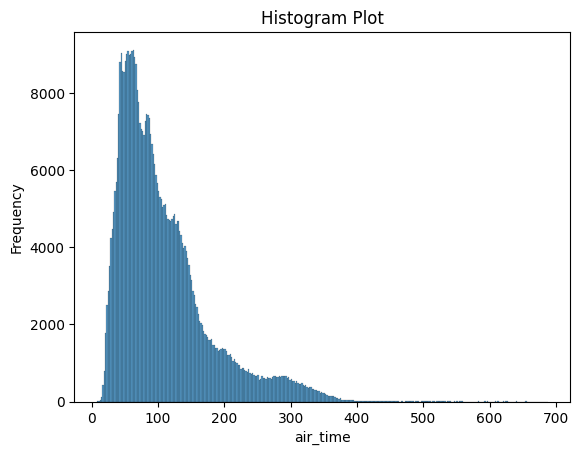

In [ ]:
# Create a histogram plot using seaborn
sns.histplot(df_takeoff['air_time'])

# Set the x-axis label
plt.xlabel('air_time')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title
plt.title('Histogram Plot')

# Display the plot
plt.show()

In [ ]:
mean_airtime=round(df_takeoff['air_time'].mean(),2)
std_airtime= round(df_takeoff['air_time'].std(),2)
print(mean_distance)
print(std_distance)

767.42
584.92


In [ ]:
df_takeoff['haul_flights_type_dis'] = 'small'
df_takeoff.loc[df_takeoff['air_time'] > 180, 'haul_flights_type_dis'] = 'medium'
df_takeoff.loc[df_takeoff['air_time'] > 360, 'haul_flights_type_dis'] = 'long'

In [ ]:
df_takeoff['haul_flights_type'] = 'small'
df_takeoff.loc[df_takeoff['air_time'] > 600, 'haul_flights_type'] = 'medium'
df_takeoff.loc[df_takeoff['air_time'] > 1900, 'haul_flights_type'] = 'long'

In [ ]:
df_takeoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fl_date                500000 non-null  object 
 1   crs_dep_time           500000 non-null  int64  
 2   wheels_off             491380 non-null  float64
 3   air_time               490095 non-null  float64
 4   distance               500000 non-null  int64  
 5   haul_flights_type_dis  500000 non-null  object 
 6   haul_flights_type      500000 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 26.7+ MB


In [ ]:
# Convert to hour and minute format
df_takeoff['crs_dep_time'] = df_takeoff['crs_dep_time'].astype(str).str.zfill(4)
df_takeoff['crs_dep_time'] = pd.to_datetime(df_takeoff['crs_dep_time'], format='%H%M', errors='coerce').dt.strftime('%H:%M')
df_takeoff['wheels_off'] = pd.to_datetime(df_takeoff['wheels_off'], format='%H%M', errors='coerce').dt.strftime('%H:%M')
# Extract the hour
df_takeoff['crs_dep_hour'] = pd.to_datetime(df_takeoff['crs_dep_time'],errors='coerce').dt.hour
df_takeoff['wheels_off_hour'] = pd.to_datetime(df_takeoff['wheels_off']).dt.hour.round(0)




C:\Users\asmaa\AppData\Local\Temp\ipykernel_13116\680534718.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_takeoff['crs_dep_hour'] = pd.to_datetime(df_takeoff['crs_dep_time'],errors='coerce').dt.hour
C:\Users\asmaa\AppData\Local\Temp\ipykernel_13116\680534718.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_takeoff['wheels_off_hour'] = pd.to_datetime(df_takeoff['wheels_off']).dt.hour.round(0)


In [ ]:
df_takeoff.head()

,fl_date,crs_dep_time,wheels_off,air_time,distance,haul_flights_type_dis,haul_flights_type,crs_dep_hour,wheels_off_hour
0,2018-07-19,11:40,13:49,66.0,416,small,small,11,13.0
1,2018-01-15,16:00,16:18,42.0,266,small,small,16,16.0
2,2018-07-29,10:55,11:00,148.0,977,small,small,10,11.0
3,2019-03-04,20:45,22:16,58.0,368,small,small,20,22.0
4,2019-07-08,11:20,11:57,31.0,83,small,small,11,11.0


In [ ]:
# Distance & crs_dep_hour'

small=df_takeoff[df_takeoff['haul_flights_type_dis']=='small']['crs_dep_hour'].value_counts().index[0]
medium=df_takeoff[df_takeoff['haul_flights_type_dis']=='medium']['crs_dep_hour'].value_counts().index[0]
long=df_takeoff[df_takeoff['haul_flights_type_dis']=='long']['crs_dep_hour'].value_counts().index[0]

print(small,medium,long)

6 7 11


In [ ]:
# Distance & wheels_off_hour
small=df_takeoff[df_takeoff['haul_flights_type_dis']=='small']['wheels_off_hour'].value_counts().index[0]
medium=df_takeoff[df_takeoff['haul_flights_type_dis']=='medium']['wheels_off_hour'].value_counts().index[0]
long=df_takeoff[df_takeoff['haul_flights_type_dis']=='long']['wheels_off_hour'].value_counts().index[0]

print(small,medium,long)

6.0 7.0 11.0


In [ ]:
# air_time & crs_dep_hour'

# small=df_takeoff[df_takeoff['haul_flights_type']=='small']['crs_dep_hour'].value_counts().index[0]
# medium=df_takeoff[df_takeoff['haul_flights_type']=='medium']['crs_dep_hour'].value_counts().index[0]
df_takeoff[df_takeoff['haul_flights_type']=='long']

# print(small,medium,long)

,fl_date,crs_dep_time,wheels_off,air_time,distance,haul_flights_type_dis,haul_flights_type,crs_dep_hour,wheels_off_hour


#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [ ]:
# column_numbers = [0, 8,9,11,12,23] 
df_airports=pd.read_csv('flights.csv',usecols=[0, 8,9,11,12,23])
df_airports.head()

,fl_date,origin_airport_id,origin,dest_airport_id,dest,arr_delay
0,2019-08-30,14004,PAE,12892,LAX,-19.0
1,2019-08-30,12892,LAX,14004,PAE,-24.0
2,2019-08-30,14004,PAE,14057,PDX,-18.0
3,2019-08-30,14057,PDX,14004,PAE,-8.0
4,2019-08-30,14004,PAE,14057,PDX,15.0


In [ ]:
flight_count = df_airports['origin'].value_counts().head(10)
total = df_airports['origin'].value_counts().sum()
percentage = (flight_count * 100) / total

df = pd.DataFrame({'origin': flight_count.index, 'Flight Count': flight_count, 'Percentage': percentage})
df.reset_index(drop=True, inplace=True)
df

,origin,Flight Count,Percentage
0,ORD,790253,4.961568
1,ATL,785850,4.933924
2,DFW,584688,3.670937
3,DEN,552134,3.466549
4,CLT,501557,3.149003
5,LAX,500840,3.144501
6,SEA,379367,2.381839
7,SFO,357626,2.245339
8,PHX,355485,2.231897
9,IAH,354379,2.224953


In [ ]:
flight_count = df_airports['dest'].value_counts().head(10)
total = df_airports['dest'].value_counts().sum()
percentage = (flight_count * 100) / total

df = pd.DataFrame({'dest': flight_count.index, 'Flight Count': flight_count})
df.reset_index(drop=True, inplace=True)
df

,dest,Flight Count
0,ORD,790129
1,ATL,785885
2,DFW,584602
3,DEN,552181
4,CLT,501492
5,LAX,500925
6,SEA,379340
7,SFO,357770
8,PHX,355462
9,IAH,354337


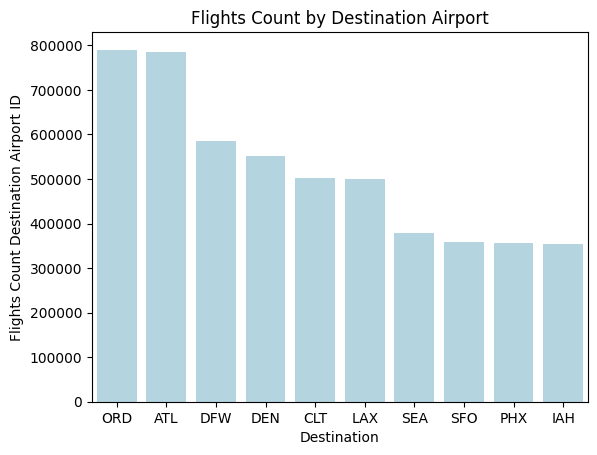

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



ax= sns.barplot(data = df,x='dest'
            ,y = 'Flight Count',color='lightblue'
            )


# Set labels and title for the plot
ax.set_xlabel('Destination')
ax.set_ylabel('Flights Count Destination Airport ID')
ax.set_title('Flights Count by Destination Airport')

plt.show()

In [ ]:
df_airports['dest_airport_id'].nunique()


375

In [ ]:
df_airports['origin_airport_id'].nunique()

375

In [ ]:
df_passengers=pd.read_csv('passengers.csv')
df_passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,30,30,1122000,4500,3165,0,0,1404,6341,5443,...,US,United States,6,694,1,2015,4,3,F,IU
1,30,30,1122000,4500,3732,0,0,1250,5954,5176,...,US,United States,6,694,1,2015,4,3,F,IU
2,30,30,786000,3000,2182,0,0,952,4712,4056,...,US,United States,6,678,1,2015,4,2,F,IU
3,30,30,786000,3000,2359,0,0,333,2581,1763,...,US,United States,6,678,1,2015,4,1,F,IU
4,30,30,1122000,4500,4072,0,0,720,3605,3077,...,US,United States,6,694,1,2015,4,2,F,IU


In [ ]:
print(df_passengers.columns)

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')


In [ ]:
Passenger_count=df_passengers.groupby(by='dest', as_index=False)['passengers'].sum()
dfp=Passenger_count.sort_values(by='passengers', ascending=False)[1:10]
dfp

,dest,passengers
1221,LAX,205188513
1672,ORD,194589089
571,DFW,164225714
569,DEN,151120966
1073,JFK,150154185
1997,SFO,134024630
1219,LAS,117605384
1984,SEA,114272139
457,CLT,113164033


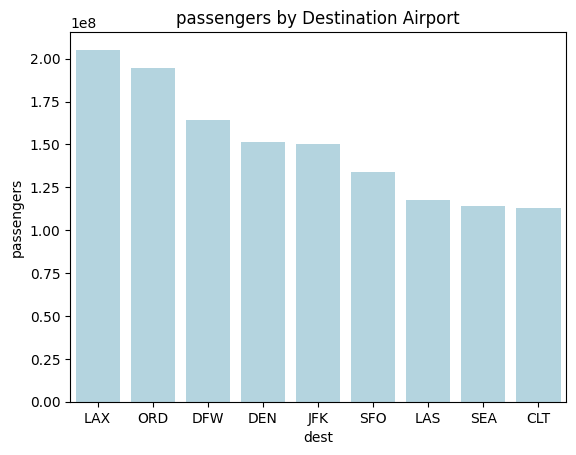

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dfp_sorted = dfp.sort_values(by='passengers', ascending=False)

ax = sns.barplot(data = dfp_sorted,x='dest'
            ,y = 'passengers',color='lightblue'
            )


# Set labels and title for the plot
ax.set_xlabel('dest')
ax.set_ylabel('passengers')
ax.set_title('passengers by Destination Airport')

plt.show()

In [ ]:
column_numbers = [0, 14,23] 
df_airports=df_flights_sample.iloc[:, column_numbers].copy()
df_airports.head()

,fl_date,crs_dep_time,arr_delay
0,2018-07-19,1140,114.0
1,2018-01-15,1600,-11.0
2,2018-07-29,1055,1.0
3,2019-03-04,2045,80.0
4,2019-07-08,1120,12.0


In [ ]:
df= pd.read_csv('data.csv')

In [ ]:
df.head()

,fl_date,mkt_unique_carrier,tail_num,origin,dest,arr_delay,distance,month,month_day,week_day,dep_hour,arr_hour
0,2019-08-30,AS,N644QX,PAE,LAX,-19.0,984,8,30,4,16.0,18.0
1,2019-08-30,AS,N644QX,LAX,PAE,-24.0,984,8,30,4,19.0,22.0
2,2019-08-30,AS,N630QX,PAE,PDX,-18.0,161,8,30,4,6.0,7.0
3,2019-08-30,AS,N644QX,PDX,PAE,-8.0,161,8,30,4,7.0,8.0
4,2019-08-30,AS,N648QX,PAE,PDX,15.0,161,8,30,4,13.0,14.0


In [ ]:
df['fl_date']=pd.to_datetime(df['fl_date'])
df['month']=df['fl_date'].dt.month
df['day_of_week'] = df['fl_date'].dt.dayofweek
df['day_of_year'] = df['fl_date'].dt.dayofyear
df['day_of_month'] = df['fl_date'].dt.day
# df['crs_dep_time'] = df['crs_dep_time'].astype(str).str.zfill(4)
# df['crs_dep_time'] = pd.to_datetime(df['crs_dep_time'], format='%H%M', errors='coerce').dt.strftime('%H:%M')
# df['hour'] = pd.to_datetime(df['crs_dep_time'],errors='coerce').dt.hour
# df.head()


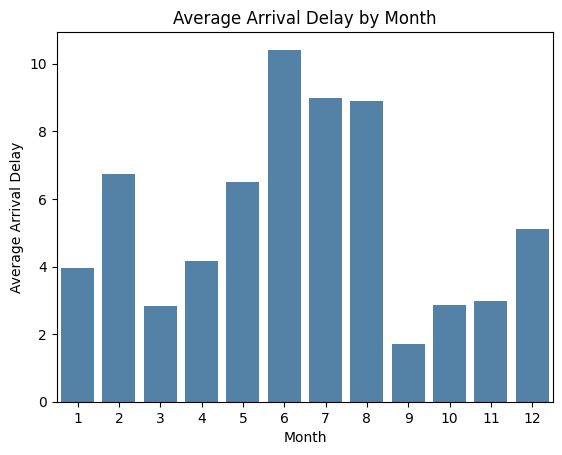

In [ ]:
df_month = df('month')['arr_delay'].mean().reset_index()

sns.barplot(data=df_month, x='month', y='arr_delay', color='steelblue')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by Month')
plt.show()

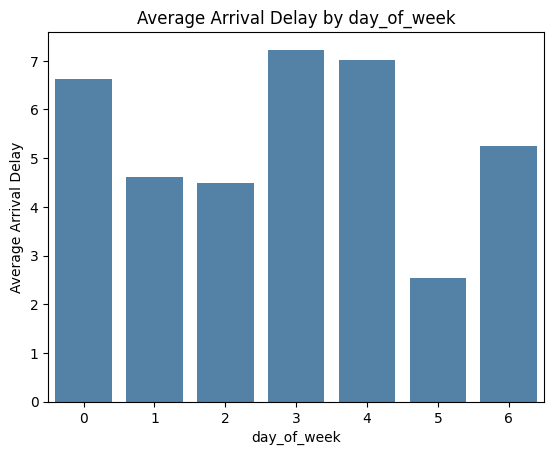

In [ ]:
df_day_of_week = df.groupby('day_of_week')['arr_delay'].mean().reset_index()

sns.barplot(data=df_day_of_week, x='day_of_week', y='arr_delay', color='steelblue')
plt.xlabel('day_of_week')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by day_of_week')
plt.show()

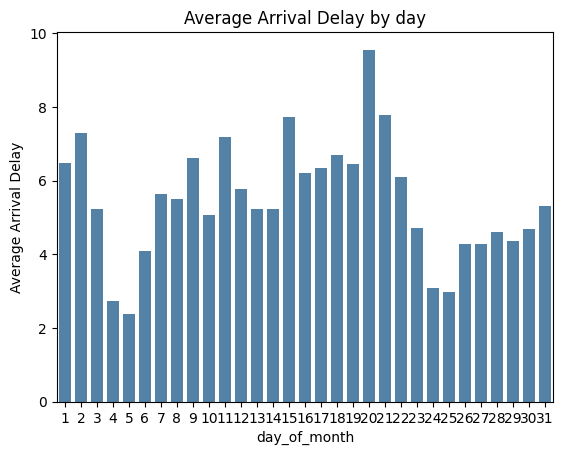

In [ ]:
df_day_of_year = df.groupby('day_of_month')['arr_delay'].mean().reset_index()

sns.barplot(data=df_day_of_year, x='day_of_month', y='arr_delay', color='steelblue')
plt.xlabel('day_of_month')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by day')
plt.show()

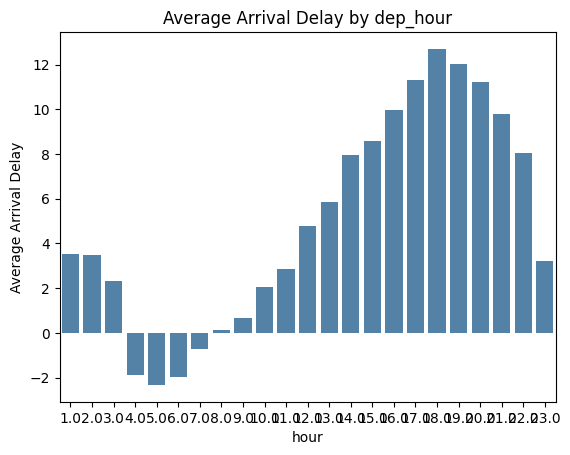

In [ ]:
df_hour = df.groupby('dep_hour')['arr_delay'].mean().reset_index()

sns.barplot(data=df_hour, x='dep_hour', y='arr_delay', color='steelblue')
plt.xlabel('hour')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by dep_hour')
plt.show()

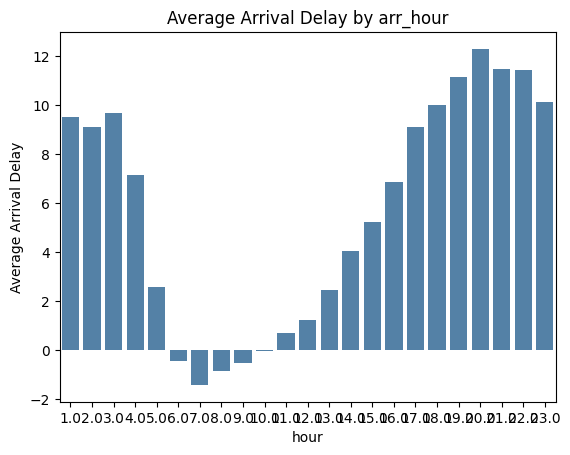

In [ ]:
df_hour = df.groupby('arr_hour')['arr_delay'].mean().reset_index()

sns.barplot(data=df_hour, x='arr_hour', y='arr_delay', color='steelblue')
plt.xlabel('hour')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by arr_hour')
plt.show()

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [ ]:
df_passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,30,30,1122000,4500,3165,0,0,1404,6341,5443,...,US,United States,6,694,1,2015,4,3,F,IU
1,30,30,1122000,4500,3732,0,0,1250,5954,5176,...,US,United States,6,694,1,2015,4,3,F,IU
2,30,30,786000,3000,2182,0,0,952,4712,4056,...,US,United States,6,678,1,2015,4,2,F,IU
3,30,30,786000,3000,2359,0,0,333,2581,1763,...,US,United States,6,678,1,2015,4,1,F,IU
4,30,30,1122000,4500,4072,0,0,720,3605,3077,...,US,United States,6,694,1,2015,4,2,F,IU


In [ ]:
print(df_passengers.columns)

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')


In [ ]:
df_distance =df_passengers.groupby(by=['unique_carrier','month'])\
    .agg({'distance':'sum','passengers':'sum'})\
    .reset_index()

df_distance.head()

,unique_carrier,month,distance,passengers
0,02Q,1,2996,104
1,02Q,2,19311,739
2,02Q,3,15673,624
3,02Q,4,14571,1391
4,02Q,5,50189,1935


In [ ]:
df_data=pd.read_csv('data.csv')

In [ ]:
df_data.head()

,fl_date,mkt_unique_carrier,tail_num,origin,dest,arr_delay,distance,month,month_day,week_day,dep_hour,arr_hour
0,2019-08-30,AS,N644QX,PAE,LAX,-19.0,984,8,30,4,16.0,18.0
1,2019-08-30,AS,N644QX,LAX,PAE,-24.0,984,8,30,4,19.0,22.0
2,2019-08-30,AS,N630QX,PAE,PDX,-18.0,161,8,30,4,6.0,7.0
3,2019-08-30,AS,N644QX,PDX,PAE,-8.0,161,8,30,4,7.0,8.0
4,2019-08-30,AS,N648QX,PAE,PDX,15.0,161,8,30,4,13.0,14.0


In [ ]:


df_data=df_data.groupby(['mkt_unique_carrier','month'])\
    .agg({'arr_delay':'mean','fl_date':'count'})\
    .reset_index()

df_data.head()

,mkt_unique_carrier,month,arr_delay,fl_date
0,AA,1,4.574156,326176
1,AA,2,7.214563,305586
2,AA,3,2.608149,346466
3,AA,4,4.127385,337295
4,AA,5,8.469414,356464


In [ ]:
df_distance = df_distance.rename(columns={'unique_carrier': 'mkt_unique_carrier'})
merged_df = df_data.merge(df_distance, on=['mkt_unique_carrier','month'], how='left')
merged_df.head()

,mkt_unique_carrier,month,arr_delay,fl_date,distance,passengers
0,AA,1,4.574156,326176,14233676,52674163
1,AA,2,7.214563,305586,13379184,49144973
2,AA,3,2.608149,346466,13801000,59178892
3,AA,4,4.127385,337295,14286408,56351731
4,AA,5,8.469414,356464,14842430,59631038


In [ ]:
x = df.groupby('mkt_unique_carrier')['arr_delay'].mean().reset_index()
x.sort_values(by='arr_delay',ascending=False)

,mkt_unique_carrier,arr_delay
2,B6,11.328906
4,F9,11.294149
8,UA,9.095866
5,G4,8.948751
0,AA,6.407416
7,NK,5.135043
10,WN,3.549976
3,DL,2.511255
9,VX,1.727978
6,HA,1.245525


In [ ]:
y = df.groupby('dest')['arr_delay'].mean().reset_index()
y.sort_values(by='arr_delay',ascending=False)[:10]

,dest,arr_delay
374,YNG,59.500000
104,DUT,26.706150
281,PPG,25.037344
282,PQI,24.971257
97,DIK,22.056373
77,CMX,20.231227
119,EWR,18.860065
326,SHD,18.470943
260,OTH,17.846262
71,CKB,16.870748


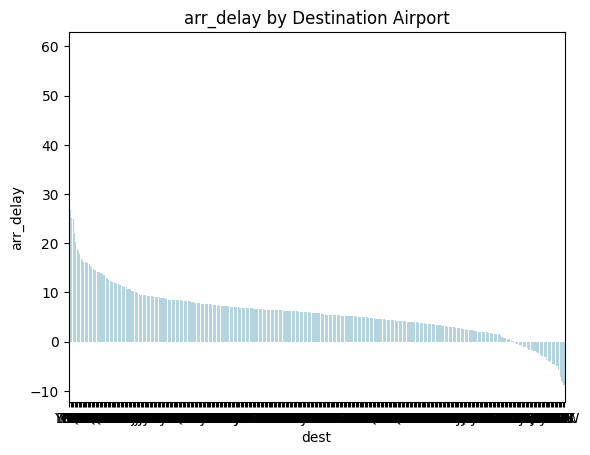

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y_sorted = y.sort_values(by='arr_delay', ascending=False)

ax = sns.barplot(data = y_sorted,x='dest'
            ,y = 'arr_delay',color='lightblue'
            )


# Set labels and title for the plot
ax.set_xlabel('dest')
ax.set_ylabel('arr_delay')
ax.set_title('arr_delay by Destination Airport')

plt.show()

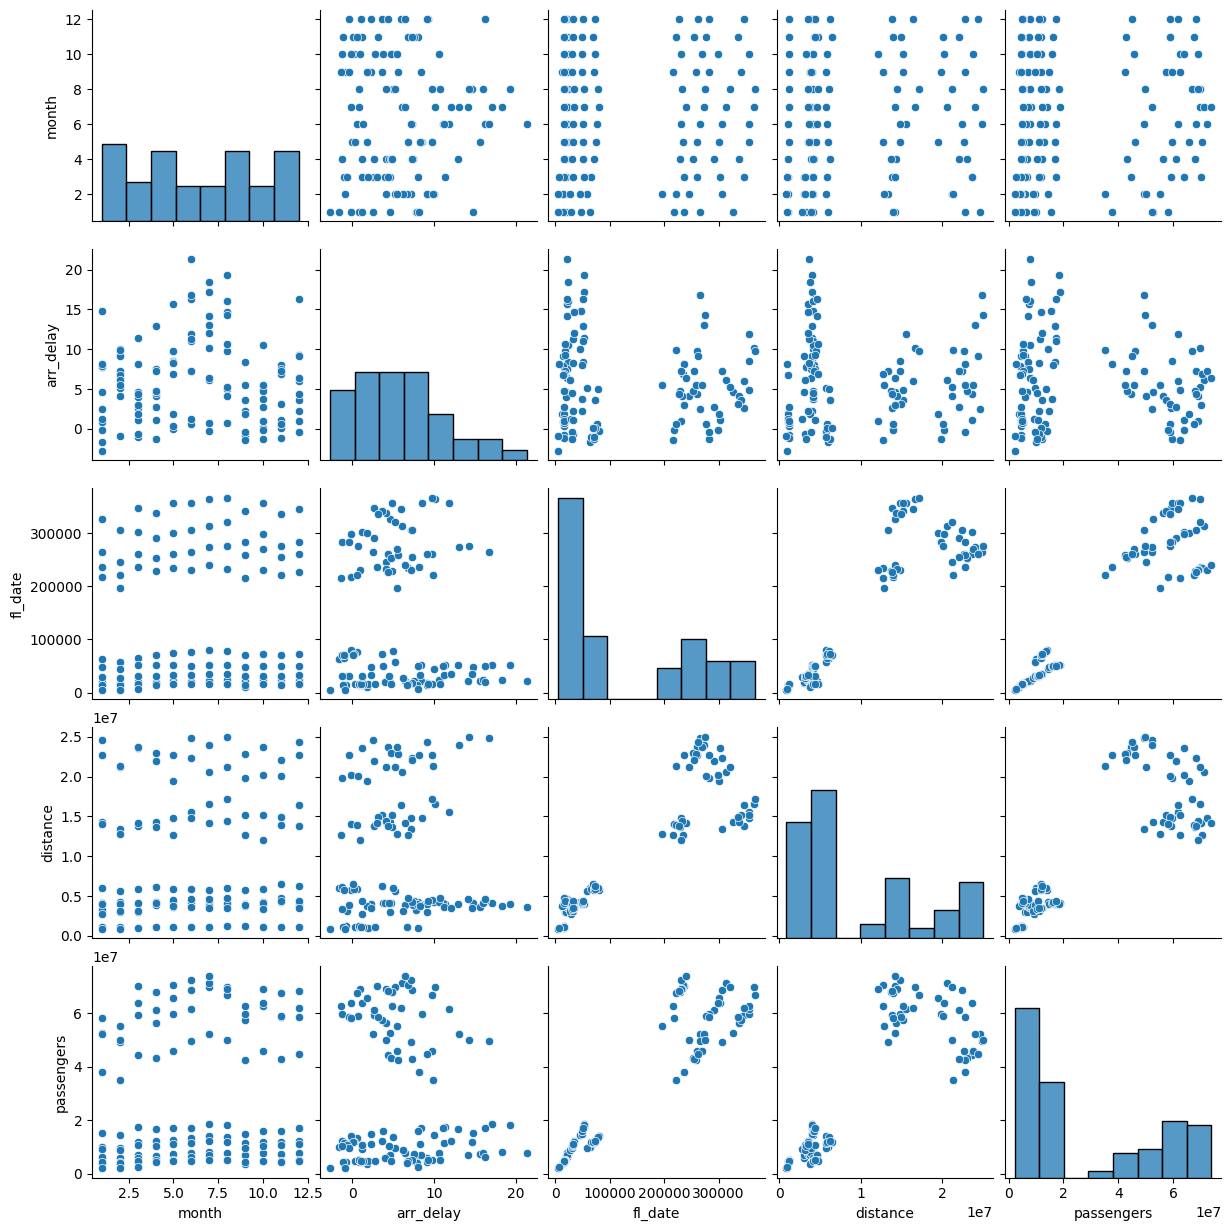

In [ ]:
sns.pairplot(merged_df)
plt.show()

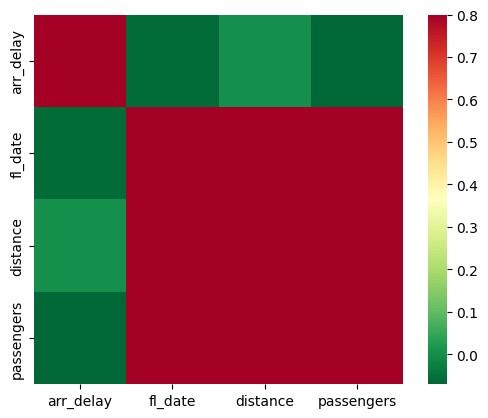

In [ ]:
#heatmap for correlation
corr= merged_df.drop(['mkt_unique_carrier','month'],axis=1)
corrmat = corr.corr()
sns.heatmap(corrmat, vmax=.8, square=True, cmap="RdYlGn_r")
plt.show()

In [ ]:
df_fuel=pd.read_csv('fuel_comsumption.csv')
print(df_fuel.columns)

Index(['month', 'airline_id', 'unique_carrier', 'carrier', 'carrier_name',
       'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons',
       'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons',
       'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost',
       'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost',
       'total_cost', 'year'],
      dtype='object')


In [ ]:
df_fuel_consumption=df_fuel.groupby(['unique_carrier','month'])['total_gallons']\
    .sum().reset_index()
df_fuel_consumption = df_fuel_consumption.rename(columns={'unique_carrier': 'mkt_unique_carrier'})
merged_df_final = merged_df.merge(df_fuel_consumption, on=['mkt_unique_carrier','month'],\
                                   how='left')
merged_df_final['gallon_per_passenger']=\
    merged_df_final['total_gallons']/merged_df_final['passengers']
merged_df_final=merged_df_final.drop('total_gallons',axis=1)
merged_df_final.head()

,mkt_unique_carrier,month,arr_delay,fl_date,distance,passengers,gallon_per_passenger
0,AA,1,4.574156,326176,14233676,52674163,25.340747
1,AA,2,7.214563,305586,13379184,49144973,24.866040
2,AA,3,2.608149,346466,13801000,59178892,23.851839
3,AA,4,4.127385,337295,14286408,56351731,24.454849
4,AA,5,8.469414,356464,14842430,59631038,24.842673


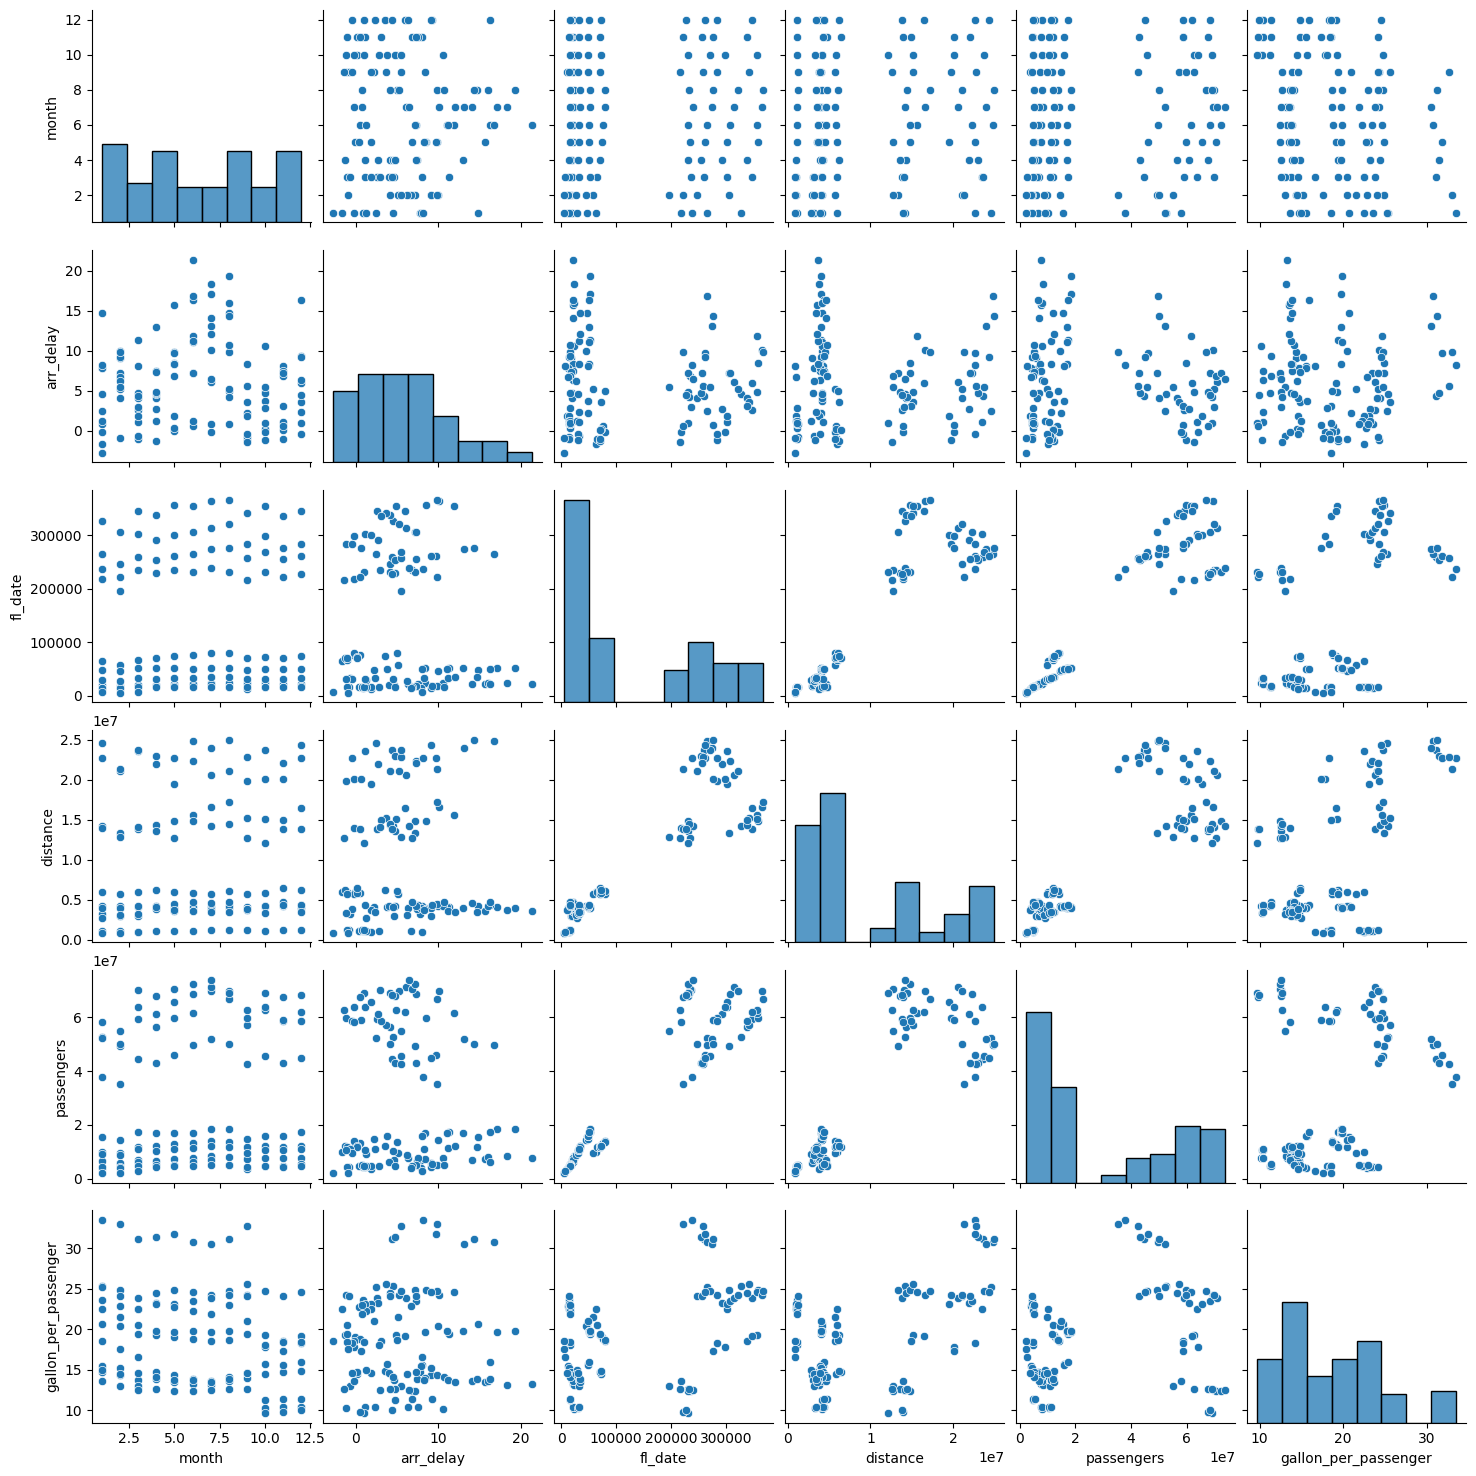

In [ ]:
sns.pairplot(merged_df_final)
plt.show()

In [2]:
#Cancellation correlation with Weather:
data1= pd.read_csv('data1.csv')

In [3]:
data1.head()

,fl_date,mkt_unique_carrier,origin,dest,arr_delay,cancelled,distance,weather_delay,month,month_day,week_day,dep_hour,arr_hour
0,2019-08-30,AS,PAE,LAX,-19.0,0,984,NaN,8,30,4,16.0,18.0
1,2019-08-30,AS,LAX,PAE,-24.0,0,984,NaN,8,30,4,19.0,22.0
2,2019-08-30,AS,PAE,PDX,-18.0,0,161,NaN,8,30,4,6.0,7.0
3,2019-08-30,AS,PDX,PAE,-8.0,0,161,NaN,8,30,4,7.0,8.0
4,2019-08-30,AS,PAE,PDX,15.0,0,161,0.0,8,30,4,13.0,14.0


In [12]:
df_weather_delay=data1.groupby('mkt_unique_carrier')['weather_delay'].mean()
df['weather_delay_carrier_mean']= (df['mkt_unique_carrier'].map(df_weather_delay)).round(2)



# df_cancelled=data1.groupby('mkt_unique_carrier')['cancelled'].mean()
# df_weather_delay


mkt_unique_carrier
AA    3.782428
AS    1.398075
B6    1.914842
DL    6.296495
F9    0.877153
G4    4.888876
HA    1.633382
NK    2.497221
UA    4.388874
VX    0.530233
WN    1.405329
Name: weather_delay, dtype: float64

In [ ]:
df_cancelled

mkt_unique_carrier
AA    0.024995
AS    0.012302
B6    0.014498
DL    0.006930
F9    0.017311
G4    0.006626
HA    0.007112
NK    0.013025
UA    0.019588
VX    0.018786
WN    0.018213
Name: cancelled, dtype: float64

In [ ]:
df_cancelled_weather_carrier=pd.merge(df_cancelled,df_weather_delay,on='mkt_unique_carrier',how='left')
df_cancelled_weather_carrier.sort_values(by='cancelled',ascending=False)

In [ ]:
df_weather_delay=data1.groupby('mkt_unique_carrier')['weather_delay'].mean()
df_cancelled=data1.groupby('mkt_unique_carrier')['cancelled'].mean()
df_weather_delay

mkt_unique_carrier
AA    3.782428
AS    1.398075
B6    1.914842
DL    6.296495
F9    0.877153
G4    4.888876
HA    1.633382
NK    2.497221
UA    4.388874
VX    0.530233
WN    1.405329
Name: weather_delay, dtype: float64

In [ ]:
data1['origin-dest']=data1['origin']+'-'+data1['dest']
data1_cancelled_Origin_dest= data1.groupby('origin-dest')['cancelled'].mean()
data1_cancelled_Origin_dest.

origin-dest
ABE-ATL    0.004673
ABE-BNA    0.000000
ABE-CLT    0.030592
ABE-DTW    0.008303
ABE-FLL    0.007812
             ...   
YKM-SEA    0.022275
YNG-PIE    0.000000
YNG-SFB    0.000000
YUM-DFW    0.012085
YUM-PHX    0.001350
Name: cancelled, Length: 6993, dtype: float64

Collecting historical data for features engineering

In [4]:
data1_weather_delay=data1.groupby('mkt_unique_carrier')['weather_delay'].mean()
data1['weather_delay_carrier_mean']= (data1['mkt_unique_carrier'].map(data1_weather_delay)).round(2)
data1. head()

,fl_date,mkt_unique_carrier,origin,dest,arr_delay,cancelled,distance,weather_delay,month,month_day,week_day,dep_hour,arr_hour,weather_delay_carrier_mean
0,2019-08-30,AS,PAE,LAX,-19.0,0,984,NaN,8,30,4,16.0,18.0,1.4
1,2019-08-30,AS,LAX,PAE,-24.0,0,984,NaN,8,30,4,19.0,22.0,1.4
2,2019-08-30,AS,PAE,PDX,-18.0,0,161,NaN,8,30,4,6.0,7.0,1.4
3,2019-08-30,AS,PDX,PAE,-8.0,0,161,NaN,8,30,4,7.0,8.0,1.4
4,2019-08-30,AS,PAE,PDX,15.0,0,161,0.0,8,30,4,13.0,14.0,1.4


In [5]:
data1['month']=data1['month'].astype(str)
data1['month_carrier']=data1['mkt_unique_carrier']+'-'+data1['month']
x= data1.groupby('month_carrier')['cancelled'].mean()
data1['month_carrier_mean']= (data1['month_carrier'].map(x)).round(2)
data1.head()

,fl_date,mkt_unique_carrier,origin,dest,arr_delay,cancelled,distance,weather_delay,month,month_day,week_day,dep_hour,arr_hour,weather_delay_carrier_mean,month_carrier,month_carrier_mean
0,2019-08-30,AS,PAE,LAX,-19.0,0,984,NaN,8,30,4,16.0,18.0,1.4,AS-8,0.01
1,2019-08-30,AS,LAX,PAE,-24.0,0,984,NaN,8,30,4,19.0,22.0,1.4,AS-8,0.01
2,2019-08-30,AS,PAE,PDX,-18.0,0,161,NaN,8,30,4,6.0,7.0,1.4,AS-8,0.01
3,2019-08-30,AS,PDX,PAE,-8.0,0,161,NaN,8,30,4,7.0,8.0,1.4,AS-8,0.01
4,2019-08-30,AS,PAE,PDX,15.0,0,161,0.0,8,30,4,13.0,14.0,1.4,AS-8,0.01


In [6]:
data1['origin-dest']=data1['origin']+'-'+data1['dest']
x= data1.groupby('origin-dest')['cancelled'].mean()
data1['origin-dest-mean']= (data1['origin-dest'].map(x)).round(2)
data1.head()

,fl_date,mkt_unique_carrier,origin,dest,arr_delay,cancelled,distance,weather_delay,month,month_day,week_day,dep_hour,arr_hour,weather_delay_carrier_mean,month_carrier,month_carrier_mean,origin-dest,origin-dest-mean
0,2019-08-30,AS,PAE,LAX,-19.0,0,984,NaN,8,30,4,16.0,18.0,1.4,AS-8,0.01,PAE-LAX,0.01
1,2019-08-30,AS,LAX,PAE,-24.0,0,984,NaN,8,30,4,19.0,22.0,1.4,AS-8,0.01,LAX-PAE,0.01
2,2019-08-30,AS,PAE,PDX,-18.0,0,161,NaN,8,30,4,6.0,7.0,1.4,AS-8,0.01,PAE-PDX,0.02
3,2019-08-30,AS,PDX,PAE,-8.0,0,161,NaN,8,30,4,7.0,8.0,1.4,AS-8,0.01,PDX-PAE,0.01
4,2019-08-30,AS,PAE,PDX,15.0,0,161,0.0,8,30,4,13.0,14.0,1.4,AS-8,0.01,PAE-PDX,0.02


In [7]:
hist= data1[['mkt_unique_carrier','weather_delay_carrier_mean','month_carrier_mean','origin-dest','origin-dest-mean','month_carrier']]
hist.to_csv('hist_data.csv', index=False)
